In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

In [2]:
sa = SentimentIntensityAnalyzer()

In [3]:
#Update VADER lexicon if needed
#Example
new_words = {
    "don't": -1.0,
    "do not": -1.0,
    'inappropriate': -2.0,
    "never": -1.0,
    "fewer": -2.0,
    "biased": -2.0,
    "not": -1.0,
    "complaints": -2.0,
    "reluctant": -2.0,
    "retaliate": -1.5,
    "retaliatory": -1.5,
    "issue": -1.0,
    "issues": -1.0,
    "subpar": -0.5,
    "sub-par": -0.5,
    "need": -2.0,
    "provide": -1.0,
    "reward": 2.0,
    "outstanding": 2.0,
    "better": 1.0,
    "enjoyed": 2.2,
    "limit": -1.0,
    "limited": -1.0,
    "outgrow": -1.0,
    "problems": -2.0,
    "problem": -2.0,
    "but": -0.5,
    "encourage": 1.0,
    "talent":1.0,
    "good": 1.5,
    "improve": -1.0,
    "gelled": 1.0,
    "could": -0.5,
    "should": -0.5,
    "could/should": -0.5,
    "should/could": -0.5,
    "still": -0.5,
    "sure": 1.0,
    "satisfactorily": 1.0,
    "wishing": -0.5,
    "wish": -0.5,
    "caustic": -2.5,
    "abrasive": -2.5,
    "rich": 0.0,
    "inclusive": 2.0,
    "collaborative": 2.0,
    "still": -1.0,
    "finish": -1.0   
}

sa.lexicon.update(new_words)

In [4]:
def compound_score(df):
    scores_list = []
    compound_list = []
    
    #Loop over df[comments] column and return sentiment scores
    for i in df['comments']:         
        scores = sa.polarity_scores(i)
        scores_list.append(scores)
    
    #Loop over score list and return compound scores
    for i in range(0,len(scores_list),1):
        compound_list.append(scores_list[i]['compound'])
    
    return scores_list, compound_list

In [5]:
def word_evaluation(df):
    word_dic={}
    
    for sentence in df['comments']:
        tokenized_sentence = nltk.word_tokenize(sentence)
        for word in tokenized_sentence:
            lower_word = word.lower()
            word_dic[lower_word] = sa.polarity_scores(lower_word)['compound']
            
    #Turn dic into array        
    word_array = np.asanyarray(list(word_dic.values()))
    
    #Turn dict into dataframe
    word_df = pd.DataFrame.from_dict(word_dic, orient='index', columns = ["score"])
    word_df['words']= word_df.index
    
    #Add word grouping by word
    std = np.std(word_df["score"])
    word_df["grp"] = np.where(word_df["score"] >= std, "pos", 
                          np.where(word_df["score"] <= -(std), "neg", "neu"))
    
    #return unique word dataframe
    unique_words = word_df.drop_duplicates(subset="words")
    
    return word_dic, word_array, word_df, unique_words

In [30]:
# Overall comment analysis
comments = pd.read_csv('filtered_comments.csv')
overall_comments = comments[['Department', 'Any Further Comments?']].copy()

#Drop all blank values
overall_comments = overall_comments.dropna(subset=['Any Further Comments?'])

#Rename column
overall_comments = overall_comments.rename(columns= {'Any Further Comments?' : 'comments'})

#Filter No and No.
overall_comments = overall_comments.loc[~overall_comments['comments'].isin(['No','No.','No. ','no', 'no.', 'not at this time'])]

#Run compoun score function and only return compound list
scores_list, compound_list = compound_score(overall_comments)

#Append scores to dataframe
overall_comments['compound'] = compound_list

#Label scores as positive or negative (threshold = 0.5)
overall_comments['pos_neg'] = np.where(overall_comments['compound'] >= 0.5, "pos", "neg")

_,word_array,word_df,unique_words = word_evaluation(overall_comments)

#Create horizontal bar graph
unique_words = word_df.drop_duplicates(subset="words")
large = unique_words.nlargest(10,columns='score')
small = unique_words.nsmallest(10,columns='score')
small = small.iloc[::-1]
top_words = pd.concat([large,small])


In [61]:
comments = pd.read_csv('filtered_comments.csv')
overall_comments = comments[['Department', 'Any Further Comments?']].copy()

In [34]:
# Dept comment analysis
comments = pd.read_csv('filtered_comments.csv')
overall_comments = comments[['Department', 'Any Further Comments?']].copy()


#Drop all blank values
overall_comments = overall_comments.dropna(subset=['Any Further Comments?'])

#Rename column
overall_comments = overall_comments.rename(columns= {'Any Further Comments?' : 'comments'})

#Filter No and No.
overall_comments = overall_comments.loc[~overall_comments['comments'].isin(['No','No.','No. ','no', 'no.', 'not at this time'])]

#Run compoun score function and only return compound list
scores_list, compound_list = compound_score(overall_comments)

#Append scores to dataframe
overall_comments['compound'] = compound_list

#Label scores as positive or negative (threshold = 0.5)
overall_comments['pos_neg'] = np.where(overall_comments['compound'] >= 0.5, "pos", "neg")

_,word_array,word_df,unique_words = word_evaluation(overall_comments)

#Create horizontal bar graph
unique_words = word_df.drop_duplicates(subset="words")
large = unique_words.nlargest(10,columns='score')
small = unique_words.nsmallest(10,columns='score')
small = small.iloc[::-1]
top_words = pd.concat([large,small])


In [ ]:
# Dept comment analysis
dept_list = ['insert list here']

for dept in dept_list:
    comments = pd.read_csv('filtered_comments.csv')
    
    overall_comments = comments[['Department', 'Any Further Comments?']].copy()
    
    overall_comments = overall_comments.loc[overall_comments['Department'] == dept]
    
      
    #Drop all blank values
    overall_comments = overall_comments.dropna(subset=['Any Further Comments?'])

    if len(overall_comments["Department"]) > 0:

        #Rename column
        overall_comments = overall_comments.rename(columns= {'Any Further Comments?' : 'comments'})

        #Filter No and No.
        overall_comments = overall_comments.loc[~overall_comments['comments'].isin(['No','No.','No. ','no', 'no.', 'not at this time'])]

        #Run compoudn score function and only return compound list
        scores_list, compound_list = compound_score(overall_comments)
    
        #Append scores to dataframe
        overall_comments['compound'] = compound_list

        #Label scores as positive or negative (threshold = 0.5)
        overall_comments['pos_neg'] = np.where(overall_comments['compound'] >= 0.5, "pos", "neg")

        _,word_array,word_df,unique_words = word_evaluation(overall_comments)

        #Create horizontal bar graph
        unique_words = word_df.drop_duplicates(subset="words")
        large = unique_words.nlargest(10,columns='score')
        small = unique_words.nsmallest(10,columns='score')
        small = small.iloc[::-1]
        top_words = pd.concat([large,small])

        #Create pie chart
    
        #count number of sentences analyzed
        sentence_count = overall_comments['pos_neg'].count()

        #Obtain unique counts
        unique, counts = np.unique(overall_comments['pos_neg'], return_counts=True)

        #Calculate percents
        percent = (counts/np.sum(counts))*100

        #Creat dict of labels and percent
        pos_neg_dict = dict(zip(unique, percent))
        pos_neg_dict.setdefault('neg', 0)
        pos_neg_dict.setdefault('pos', 0)

        labels = ['Negative', 'Positive']
        sizes = [pos_neg_dict['neg'], pos_neg_dict['pos']]
        explode = [0,0.001]

        #Colors
        color_pie = ["lightcoral","lightskyblue"]

        #Plotting Figures
        fig = plt.figure(tight_layout=False,figsize=(10, 14))
        gs = GridSpec(2, 2, figure=fig)
        ax1 = fig.add_subplot(gs[0,0])
        ax2 = fig.add_subplot(gs[0,1])
        ax3 = fig.add_subplot(gs[1,:])

        fig.suptitle(f"Sentiment Analysis ({sentence_count} responses analyzed)", weight="semibold", fontname = "Arial", fontsize = 18, x = 0.5, y = .95)
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = color_pie, explode=explode, textprops={'fontsize': 18})
        ax1.axis('equal')
        ax1.set_title("A. Comment Sentiment Breakdown", loc="left", fontsize=16)

        #Creating graph for words
        color_pal = ["lightcoral","grey","lightskyblue"]
        sns.set(style='whitegrid', rc = {'font.size': 12})
        box = sns.boxplot(x="grp", y="score", data=word_df, order=["neg", "neu", "pos"], palette=color_pal, ax=ax2)
        ax2.tick_params(labelsize = 16)
        box.set_xlabel("Word Grouping",fontsize=18)
        box.set_ylabel("Polarity Score",fontsize=18)
        box.set(xticklabels = ["Negative", "Neutral", "Positive"])
        box.set_title("B. Word Count and Polarity Score", loc="left", fontsize = 16)

        #Create legend
        nobs = word_df["grp"].value_counts()
        nobs = nobs.to_dict()
        nobs.setdefault("neg", 0)
        nobs.setdefault("pos", 0)
        nobs.setdefault("neu", 0)
        neg_count = nobs["neg"]
        neu_count = nobs["neu"]
        pos_count = nobs["pos"]

        negative = mpatches.Patch(color='lightcoral', label=f"Negative ({neg_count})")
        neutral = mpatches.Patch(color='grey', label=f"Neutral ({neu_count})")
        positive = mpatches.Patch(color='lightskyblue', label=f"Positive ({pos_count})")
        box.legend(title= "Group (count)",handles=[negative, neutral, positive], prop={'size': 12})

        #Top word chart
        bar_clrs = ['lightskyblue' if x == 'pos' else 'lightcoral' for x in top_words['grp']]
        sns.set(style='whitegrid', rc = {'font.size': 18})
        bar = sns.barplot(x = 'score', y = 'words', data = top_words, palette=bar_clrs, ax=ax3)    
        ax3.tick_params(labelsize = 16)   
        bar.set_xlabel("Polarity Score",fontsize=18)
        bar.set_ylabel("Words",fontsize=18)
        bar.set_title("C. Top Positive and Negative Words", loc="left", fontsize = 16)

        plt.subplots_adjust(wspace=0.5, top=0.9)
        plt.savefig(str(dept)+' sentiment.jpeg', format='jpeg', dpi=600)
        plt.close()
    else:
        print(f"{dept} has less than 1.")

        

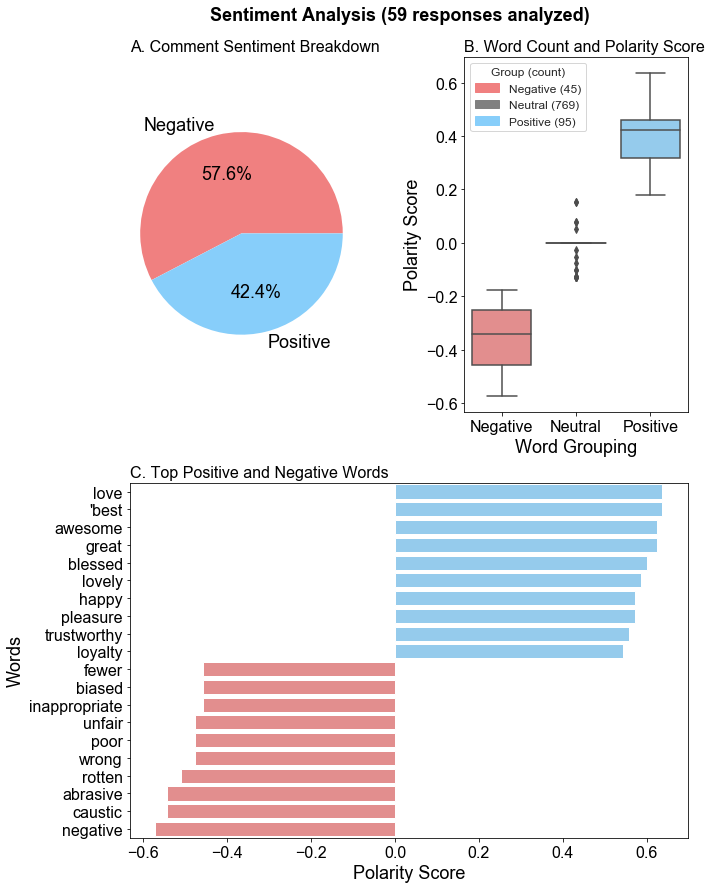

In [19]:
#Create pie chart

#count number of sentences analyzed
sentence_count = overall_comments['pos_neg'].count()

#Obtain unique counts
unique, counts = np.unique(overall_comments['pos_neg'], return_counts=True)

#Calculate percents
percent = (counts/np.sum(counts))*100

#Creat dict of labels and percent
pos_neg_dict = dict(zip(unique, percent))

labels = ['Negative', 'Positive']
sizes = [pos_neg_dict['neg'], pos_neg_dict['pos']]
explode = [0,0.001]

#Colors
color_pie = ["lightcoral","lightskyblue"]

#Plotting Figures
fig = plt.figure(tight_layout=False,figsize=(10, 14))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:])

fig.suptitle(f"Sentiment Analysis ({sentence_count} responses analyzed)", weight="semibold", fontname = "Arial", fontsize = 18, x = 0.5, y = .95)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = color_pie, explode=explode, textprops={'fontsize': 18})
ax1.axis('equal')
ax1.set_title("A. Comment Sentiment Breakdown", loc="left", fontsize=16)

#Creating graph for words
color_pal = ["lightcoral","grey","lightskyblue"]
sns.set(style='whitegrid', rc = {'font.size': 12})
box = sns.boxplot(x="grp", y="score", data=word_df, order=["neg", "neu", "pos"], palette=color_pal, ax=ax2)
ax2.tick_params(labelsize = 16)
box.set_xlabel("Word Grouping",fontsize=18)
box.set_ylabel("Polarity Score",fontsize=18)
box.set(xticklabels = ["Negative", "Neutral", "Positive"])
box.set_title("B. Word Count and Polarity Score", loc="left", fontsize = 16)

#Create legend
nobs = word_df['grp'].value_counts()
neg_count = nobs["neg"]
neu_count = nobs["neu"]
pos_count = nobs["pos"]

negative = mpatches.Patch(color='lightcoral', label=f"Negative ({neg_count})")
neutral = mpatches.Patch(color='grey', label=f"Neutral ({neu_count})")
positive = mpatches.Patch(color='lightskyblue', label=f"Positive ({pos_count})")
box.legend(title= "Group (count)",handles=[negative, neutral, positive], prop={'size': 12})

"""""""""
medians = word_df.groupby(['grp'])['score'].median().values
nobs = word_df['grp'].value_counts()
a = (nobs["neg"], nobs["neu"], nobs["pos"])
nobs = np.asanyarray(a)
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,box.get_xticklabels()):
    box.text(pos[tick], medians[tick] + 0.01, nobs[tick],
    horizontalalignment='center', size='x-small', color='black', weight='normal')
"""""""""
    
#Top word chart
bar_clrs = ['lightskyblue' if x == 'pos' else 'lightcoral' for x in top_words['grp']]
sns.set(style='whitegrid', rc = {'font.size': 18})
bar = sns.barplot(x = 'score', y = 'words', data = top_words, palette=bar_clrs, ax=ax3)    
ax3.tick_params(labelsize = 16)   
bar.set_xlabel("Polarity Score",fontsize=18)
bar.set_ylabel("Words",fontsize=18)
bar.set_title("C. Top Positive and Negative Words", loc="left", fontsize = 16)
    
plt.subplots_adjust(wspace=0.5, top=0.9)
plt.savefig('sentiment.jpeg', format='jpeg', dpi=600)

In [281]:
pos_word_list, neu_word_list, neg_word_list, score = check_word_seniment(overall_comments['comments'][152])
print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
print('\nScores:', score)

Positive: ['inclusive', 'collaborative', 'created']
Neutral: ['The', 'and', 'environment', 'in', 'UIT', 'is', 'rare', 'to', 'find', 'in', 'today', "'s", 'workplace', '.']
Negative: []

Scores: {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7906}


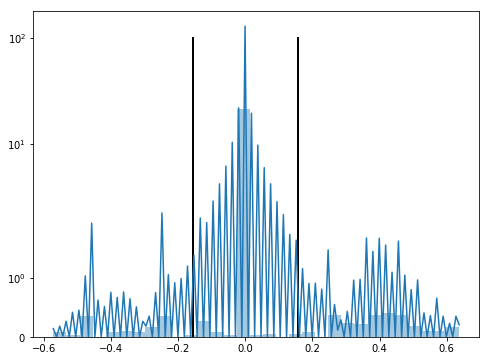

In [93]:
plt.figure(figsize=[8, 6])
plt.yscale("symlog")
plt.plot([std, std], [0, 100], 'k-', lw=2)
plt.plot([-(std), -(std)], [0, 100], 'k-', lw=2)
sns.distplot(word_array)